<a href="https://colab.research.google.com/github/NagaSaiRam89/21_daysML/blob/main/Day_9/Day_9_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

In [2]:
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    # Print information about the dataset
    print(info)

except Exception as e:
    print(f"Error loading dataset: {e}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.ZA44GT_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.ZA44GT_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.ZA44GT_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see

In [3]:
from tensorflow.keras.applications import resnet50, vgg16, mobilenet_v2
def preprocess_resnet50(image, label):
    image = tf.image.resize(image, (224, 224))
    image = resnet50.preprocess_input(image)
    return image, label

def preprocess_vgg16(image, label):
    image = tf.image.resize(image, (224, 224))
    image = vgg16.preprocess_input(image)
    return image, label

def preprocess_mobilenetv2(image, label):
    image = tf.image.resize(image, (224, 224))
    image = mobilenet_v2.preprocess_input(image)
    return image, label

# Apply preprocessing using map()
train_resnet50 = train_dataset.map(preprocess_resnet50, num_parallel_calls=tf.data.AUTOTUNE)
test_resnet50 = test_dataset.map(preprocess_resnet50, num_parallel_calls=tf.data.AUTOTUNE)

train_vgg16 = train_dataset.map(preprocess_vgg16, num_parallel_calls=tf.data.AUTOTUNE)
test_vgg16 = test_dataset.map(preprocess_vgg16, num_parallel_calls=tf.data.AUTOTUNE)

train_mobilenetv2 = train_dataset.map(preprocess_mobilenetv2, num_parallel_calls=tf.data.AUTOTUNE)
test_mobilenetv2 = test_dataset.map(preprocess_mobilenetv2, num_parallel_calls=tf.data.AUTOTUNE)


In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
epochs = 2

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))

# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False
for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50 = model_resnet50.fit(
    train_resnet50.batch(32).prefetch(tf.data.AUTOTUNE),
    epochs=epochs,
    validation_data=test_resnet50.batch(32).prefetch(tf.data.AUTOTUNE)
)


# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False
for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16 = model_vgg16.fit(
    train_vgg16.batch(32).prefetch(tf.data.AUTOTUNE),
    epochs=epochs,
    validation_data=test_vgg16.batch(32).prefetch(tf.data.AUTOTUNE)
)


# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False
for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(
    train_mobilenetv2.batch(32).prefetch(tf.data.AUTOTUNE),
    epochs=epochs,
    validation_data=test_mobilenetv2.batch(32).prefetch(tf.data.AUTOTUNE)
)


178
22
157
Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 1199s 38s/step - accuracy: 0.9819 - loss: 0.1165 - val_accuracy: 0.4319 - val_loss: 6.2438
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 1195s 38s/step - accuracy: 0.9872 - loss: 0.0408 - val_accuracy: 0.6752 - val_loss: 1.9251
Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 3676s 118s/step - accuracy: 0.7150 - loss: 1.0640 - val_accuracy: 0.4646 - val_loss: 2.6278
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 3687s 118s/step - accuracy: 0.8304 - loss: 0.6437 - val_accuracy: 0.5081 - val_loss: 2.3873
Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 329s 10s/step - accuracy: 0.1531 - loss: 4.2139 - val_accuracy: 0.0797 - val_loss: 6.3736
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 286s 9s/step - accuracy: 0.8252 - loss: 0.7934 - val_accuracy: 0.1364 - val_loss: 6.3399


In [10]:
acc_resnet50    = model_resnet50.evaluate(test_resnet50.batch(32).prefetch(tf.data.AUTOTUNE))[1]
acc_vgg16       = model_vgg16.evaluate(test_vgg16.batch(32).prefetch(tf.data.AUTOTUNE))[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(test_mobilenetv2.batch(32).prefetch(tf.data.AUTOTUNE))[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')


193/193 ━━━━━━━━━━━━━━━━━━━━ 942s 5s/step - accuracy: 0.6720 - loss: 2.0189
193/193 ━━━━━━━━━━━━━━━━━━━━ 3141s 16s/step - accuracy: 0.5079 - loss: 2.4448
193/193 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.1335 - loss: 6.2781
ResNet50 Accuracy: 0.68
VGG16 Accuracy: 0.51
MobileNetV2 Accuracy: 0.14


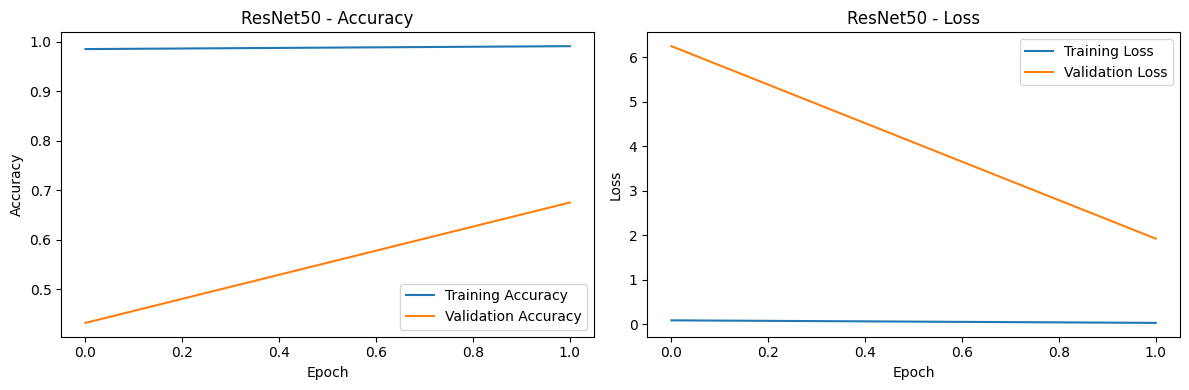

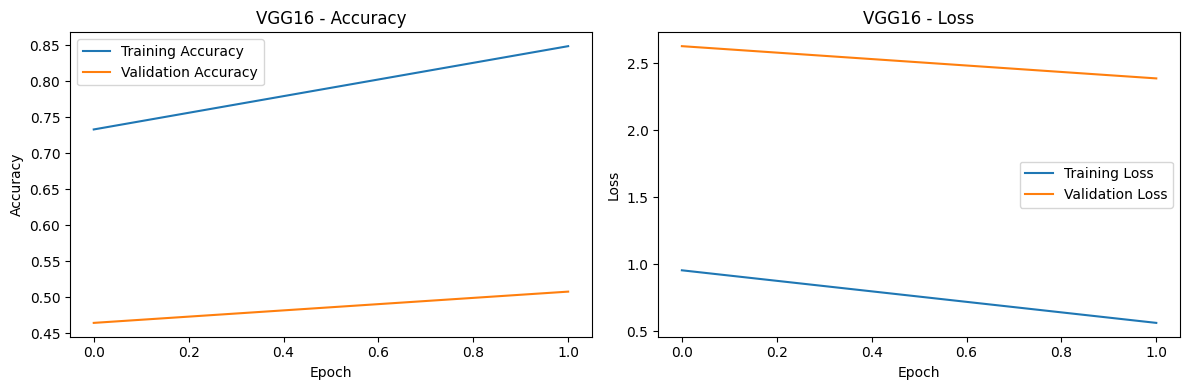

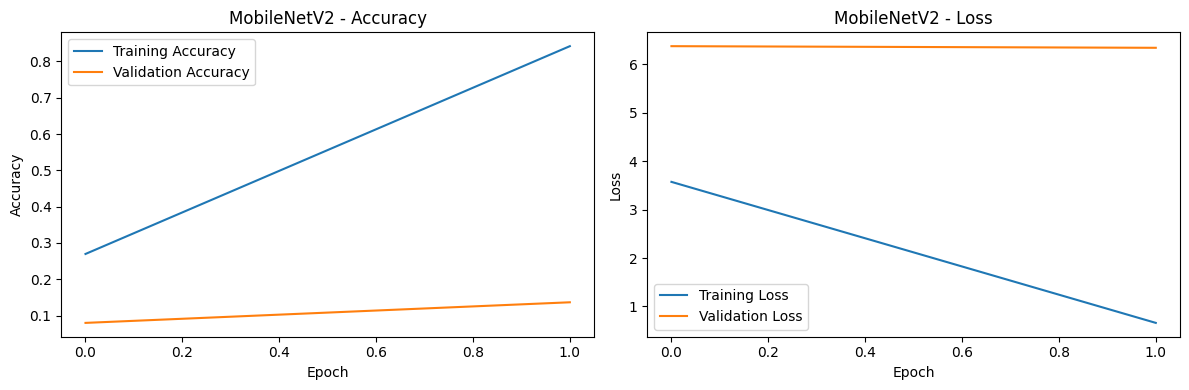

In [11]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

In [12]:
# Save the models
model_resnet50.save('resnet50_cifar100.h5')
model_vgg16.save('vgg16_cifar100.h5')
model_mobilenetv2.save('mobilenetv2_cifar100.h5')